# Функции в Pandas
Примеры из презентации

In [2]:
import pandas as pd

In [98]:
df = pd.DataFrame({'user_id': [1, 2, 3], 'clicks': [163, 130, 97], 'orders': [2, 4, 0]})
df

,clicks,orders,user_id
0,163,2,1
1,130,4,2
2,97,0,3


In [99]:
def watcher(a):
    """Мне только посмотреть"""
    if a == 0:
        return True
    
    return False

Применяем метод apply к одному столбцу. Сейчас в переменную функции передаются значения одного столбца

In [101]:
df['watcher'] = df['orders'].apply(watcher)
df

,clicks,orders,user_id,watcher
0,163,2,1,False
1,130,4,2,False
2,97,0,3,True


In [107]:
def conversion(a):
    """Подсчет конверсии переходов в покупки"""
    return a['orders'] / a['clicks']

Применяем метод apply к датафрейму. В переменную функции передаются строки целиком

In [106]:
df['conversion'] = df.apply(conversion, axis=1)
df

,clicks,orders,user_id,watcher,conversion
0,163,2,1,False,0.012270
1,130,4,2,False,0.030769
2,97,0,3,True,0.000000


### Анализ рекламных кампаний

In [3]:
stats = pd.read_excel('ad_campaigns.xlsx')
stats.head()

,Название группы,Фраза (с минус-словами),Продуктивность,ID объявления,Заголовок,Текст,Ссылка
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...


In [5]:
stats.columns = ['group', 'phrase', 'effect', 'ad_id', 'title', 'text', 'link']
stats.head()

,group,phrase,effect,ad_id,title,text,link
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...


### Lambda-функции
Хотим посчитать распределение количества слов в столбце с фразами

In [6]:
stats['word_count'] = stats['phrase'].apply(lambda x: len(x.split(' ')))
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2


In [7]:
# вариант с передачей всей строчки функции
# тут надо обязательно указать параметр axis = 1

stats['word_count'] = stats.apply(lambda x: len(x['phrase'].split(' ')), axis=1)
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2


In [8]:
stats['word_count'].value_counts()

3     1129
4      529
2      189
5      137
6       84
7       38
8       30
9       12
10       6
12       2
21       1
17       1
11       1
Name: word_count, dtype: int64

In [7]:
%matplotlib inline

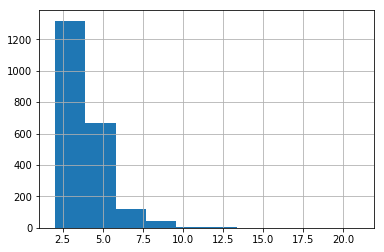

In [8]:
stats['word_count'].hist()

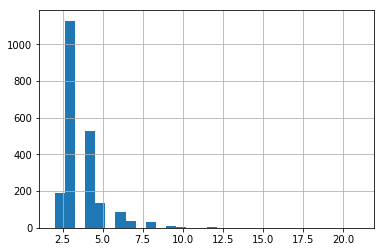

In [9]:
stats['word_count'].hist(bins=30)

### Упражнение
Поисковые запросы с каким количеством слов встречаются в наших данных чаще всего? Выведите топ-5

### Произвольные функции
В URL кампаний есть названия. С этим надо что-то делать

In [10]:
# пример ссылки
url = stats.loc[0, 'link']
url

'https://awesome-site.ru/?utm_source=yandex&utm_medium=cpc&utm_campaign=a825749b87&utm_content=dev_{device_type}'

In [16]:
from urllib import parse

In [12]:
parse.urlsplit('https://ya.ru/news/sport?search=footbal')

SplitResult(scheme='https', netloc='ya.ru', path='/news/sport', query='search=footbal', fragment='')

In [13]:
parsed = parse.urlsplit(url)
parsed

SplitResult(scheme='https', netloc='awesome-site.ru', path='/', query='utm_source=yandex&utm_medium=cpc&utm_campaign=a825749b87&utm_content=dev_{device_type}', fragment='')

In [14]:
# можно конечно вручную
parsed.query.split('&')[2].split('=')[1]

'a825749b87'

In [15]:
# как доставать значения

parsed.netloc

'awesome-site.ru'

In [17]:
params = parse.parse_qs(parsed.query)
params

{'utm_campaign': ['a825749b87'],
 'utm_content': ['dev_{device_type}'],
 'utm_medium': ['cpc'],
 'utm_source': ['yandex']}

In [18]:
# вот и кампании

params['utm_campaign'][0]

'a825749b87'

In [15]:
# зачем тут везде списки?

url_with_doubles = 'https://awesome-site.ru/?a=1&a=2&a=3'

parsed = parse.urlsplit(url_with_doubles)
parse.parse_qs(parsed.query)

NameError: name 'parse' is not defined

In [17]:
# оборачиваем все в функцию
# в качестве аргумента будет строка датафрейма

def campaign_name(row):
    """Получение названия кампании из ссылки внутри строки row"""

    parsed = parse.urlsplit(row['link'])
    params_dict = parse.parse_qs(parsed.query)

    return params_dict['utm_campaign'][0]

In [9]:
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2


In [18]:
stats['campaign'] = stats.apply(campaign_name, axis=1)
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count,campaign
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,a825749b87
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,a825749b87
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6,a825749b87
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,9cc0c5f6ca
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,9cc0c5f6ca


In [19]:
# как передать несколько аргументов

def power_up(row, n):
    """Возводит значение столбца effect в степень n"""
    return row['effect'] ** n

In [20]:
stats['power_up'] = stats.apply(power_up, n=3, axis=1)
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count,campaign,power_up
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,a825749b87,91.125
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,a825749b87,91.125
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6,a825749b87,405.224
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,9cc0c5f6ca,125.000
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,9cc0c5f6ca,125.000


### Упражнение
В наших данных есть много объявлений с услугой МРТ (в названии группы есть слово 'мрт') круглосуточно (в тексте объявления есть '24 часа'). Выделите строки, в которых не упоминается МРТ, но прием идет круглосуточно. Сколько таких строк в датасете?

# Группировки

In [22]:
df = pd.DataFrame({'order_id': [1, 2, 3, 4, 5], 'country': ['Россия', 'Китай', 'Китай', 'Россия', 'Россия'], 
                   'category': ['Электроника', 'Авто', 'Электроника', 'Авто', 'Авто'], 
                   'amount': [100, 80, 90, 140, 90]})
df

,order_id,country,category,amount
0,1,Россия,Электроника,100
1,2,Китай,Авто,80
2,3,Китай,Электроника,90
3,4,Россия,Авто,140
4,5,Россия,Авто,90


### Упражнение
Создайте датафрейм df_russia, в котором оставьте заказы из России. И аналогично df_china (заказы из Китая).

In [25]:
df_russia = df[(df.country == 'Россия')]
df_china = df[(df.country == 'Китай')]

In [28]:
df_russia.amount.mean()

110.0

In [27]:
df_china

,order_id,country,category,amount
1,2,Китай,Авто,80
2,3,Китай,Электроника,90


### Упражнение
Посчитайте для df_russia и df_china:
- среднюю стоимость заказа
- разницу между максимальной и минимальной стоимостью заказа

In [30]:
df_russia.amount.mean()

110.0

In [29]:
df_china.amount.mean()

85.0

In [35]:
df_russia.amount.max()-df_russia.amount.min()

50

In [36]:
df_china.amount.max()-df_china.amount.min()

10

Объединим процесс разбиения на датафреймы

In [41]:
def groupby_function(data):
    return data.amount.mean()

In [42]:
df.groupby('country').apply(groupby_function)

country
Китай      85.0
Россия    110.0
dtype: float64

In [45]:
df.groupby('country').amount.mean()

country
Китай      85
Россия    110
Name: amount, dtype: int64

Вернемся к статистике рекламных кампаний

In [25]:
# раньше использовали value_counts

stats['campaign'].value_counts().head()

7f35591a28    456
8e77a0e565    348
2cc2e7d770    240
f6d2ae1e3d    220
e90f4db55a    218
Name: campaign, dtype: int64

In [26]:
# более универсальный способ

stats.groupby('campaign').count().head()

,group,phrase,effect,ad_id,title,text,link,word_count,power_up
campaign,,,,,,,,,
034ada41b6,3,3,3,3,3,3,3,3,3
03fcaecd1d,2,2,2,2,2,2,2,2,2
0697a81555,2,2,2,2,2,2,2,2,2
08cdcb57a3,3,3,3,3,3,3,3,3,3
0f0ba311fb,2,2,2,2,2,2,2,2,2


In [27]:
stats.groupby('campaign').count()[['group', 'effect']].head()

,group,effect
campaign,,
034ada41b6,3,3
03fcaecd1d,2,2
0697a81555,2,2
08cdcb57a3,3,3
0f0ba311fb,2,2


In [28]:
stats.index.values

array([   0,    1,    2, ..., 2156, 2157, 2158])

### Как вернуть столбец из индекса

In [48]:
stats.groupby('campaign').count().reset_index().head()

,campaign,group,phrase,effect,ad_id,title,text,link,word_count,power_up
0,034ada41b6,3,3,3,3,3,3,3,3,3
1,03fcaecd1d,2,2,2,2,2,2,2,2,2
2,0697a81555,2,2,2,2,2,2,2,2,2
3,08cdcb57a3,3,3,3,3,3,3,3,3,3
4,0f0ba311fb,2,2,2,2,2,2,2,2,2


In [30]:
# тоже самое, что с value_counts

stats.groupby('campaign').count().reset_index().sort_values('group', ascending=False).head() 

,campaign,group,phrase,effect,ad_id,title,text,link,word_count,power_up
62,7f35591a28,456,456,456,456,456,456,456,456,456
69,8e77a0e565,348,348,348,348,348,348,348,348,348
22,2cc2e7d770,240,240,240,240,240,240,240,240,240
110,f6d2ae1e3d,220,220,220,220,220,220,220,220,220
105,e90f4db55a,218,218,218,218,218,218,218,218,218


In [31]:
# но теперь можно менять функции ура

stats.groupby('campaign').sum().sort_values('effect').head()

,effect,ad_id,word_count,power_up
campaign,,,,
63153306ff,2.8,2428554756,4,21.952
f80e902d76,3.3,2101705003,2,35.937
5a7508fa8d,3.5,2428554764,4,42.875
d5b16c7769,3.6,3401169381,4,46.656
7b17b2d188,5.8,2101705006,2,195.112


### Упражнение
Для каждой кампании campaign найдите минимальное значение столбца effect и постройте рейтинг кампаний по этим значениям, начиная с самого низкого.

### Несколько функций в группировках

In [49]:
# задаем несколько функций сразу

stats.groupby('campaign').agg(['min', 'max'])['effect'].head()

,min,max
campaign,,
034ada41b6,4.1,9.0
03fcaecd1d,4.0,6.5
0697a81555,4.0,5.5
08cdcb57a3,5.5,7.4
0f0ba311fb,4.4,6.4


In [52]:
# разные метрики для разных столбцов

res = stats.groupby('campaign').agg({'effect': ['min', 'max'], 'power_up': 'mean'}).head()

In [54]:
res['effect']['max']

campaign
034ada41b6    9.0
03fcaecd1d    6.5
0697a81555    5.5
08cdcb57a3    7.4
0f0ba311fb    6.4
Name: max, dtype: float64

In [51]:
stats.groupby('campaign').agg({'effect': ['min', 'max'], 'power_up': 'mean'})['effect']['max']

campaign
034ada41b6    9.0
03fcaecd1d    6.5
0697a81555    5.5
08cdcb57a3    7.4
0f0ba311fb    6.4
10f0dbeae4    2.3
1176612405    6.1
11d5b8b473    4.9
172c17eaba    7.6
1849dc35cf    8.4
1a39ecc6ce    2.4
1a419ad286    4.3
1f39b7a501    2.9
218404d350    7.5
22797af531    5.4
23d6da5a5a    8.7
254567583a    6.3
2775b98c81    8.7
27d3cfb133    8.5
285b2840bb    8.7
28d8dca4df    8.4
2b6d8d8535    8.7
2cc2e7d770    8.1
2db1121377    2.2
3157b77d24    8.7
33e8b25a9e    6.7
3cba0fca70    8.7
3e3a02c7b5    8.7
3eb8e263e0    8.5
41af22f2cc    8.8
             ... 
a825749b87    7.4
acc3077e55    7.7
adbedfa534    8.3
b067aafafd    4.9
b0fb5bd15c    8.7
b3f52e6f64    7.5
bcc95186aa    8.7
bd64204705    7.1
be97523396    7.9
c0c9fe22b7    6.9
c189a246bd    8.5
c2e4dcddaf    6.9
d0712ff587    8.7
d5b16c7769    3.6
d920f4dfbb    4.8
d96029561c    7.7
da872d1fb4    6.6
e2a26d3100    4.3
e2e45b2b2a    3.8
e7b94d5bd9    8.1
e90f4db55a    7.9
eb577faed1    8.5
edb6a77e3b    8.7
f0079349af    7.5
f

In [55]:
# группировка по нескольким столбцам

stats.groupby(['group', 'campaign']).count().head()

phrase  effect  ad_id  title  text  link  \
group                campaign                                               
1 5 москва мрт тесла 777160ba51       1       1      1      1     1     1   
                     8e77a0e565       1       1      1      1     1     1   
                     f0079349af       1       1      1      1     1     1   
1 градская мрт       7f35591a28       3       3      3      3     3     3   
1 мрт нагатинский    8e77a0e565       1       1      1      1     1     1   

                                 word_count  power_up  
group                campaign                          
1 5 москва мрт тесла 777160ba51           1         1  
                     8e77a0e565           1         1  
                     f0079349af           1         1  
1 градская мрт       7f35591a28           3         3  
1 мрт нагатинский    8e77a0e565           1         1

In [56]:
# максимальное число объявлений в одной группе

stats.groupby(['group', 'campaign']).count().sort_values('phrase', ascending=False).head()

,,phrase,effect,ad_id,title,text,link,word_count,power_up
group,campaign,,,,,,,,
мрт на алексеевской кулаков переулок 13,7f35591a28,3,3,3,3,3,3,3,3
мрт каширское шоссе,7f35591a28,3,3,3,3,3,3,3,3
мрт кутузовский,7f35591a28,3,3,3,3,3,3,3,3
мрт куркинское шоссе 30,7f35591a28,3,3,3,3,3,3,3,3
мрт куркино,7f35591a28,3,3,3,3,3,3,3,3


### Упражнение
Какая кампания имеет наименьшую сумму по столбцу effect? 

In [65]:
stats.groupby('campaign').sum().sort_values('effect', ascending=False)

,effect,ad_id,word_count,power_up
campaign,,,,
7f35591a28,2645.3,965277596819,1878,114217.277
8e77a0e565,1733.6,850584406408,1195,69739.928
2cc2e7d770,966.8,512572671002,865,27827.582
7388fb4c7b,896.9,437154834440,689,29766.395
e90f4db55a,842.0,458171988130,715,21644.042
f6d2ae1e3d,755.3,462375352742,723,13550.615
be97523396,415.4,180746674824,290,14621.192
8d3a748298,106.1,65570984425,107,3488.981
acc3077e55,79.2,43713994104,57,2533.308


# Агрегированные группировки
Считаем метрики для пользователей, которые выставили 100 и более оценок

In [59]:
ratings = pd.read_csv('ml-latest-small/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


### Упражнение
Посчитайте среднее значение Lifetime киноманов (пользователи, которые поставили 100 и более рейтингов). Под Lifetime понимается разница между максимальным и минимальным значением timestamp для каждого пользователя. Ответ дайте в днях.

In [ ]:
ratings.groupby('userId').count().head()

In [ ]:
ratings_filtered[.... > 100]

In [ ]:
ratings_filtered['userId'].tolist()

In [ ]:
ratings[ ratings['userId'].isin(...) ]